In [1]:
# Import libraries
import os
import re
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, date, time
from natsort import natsorted
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
# Read in usable subs & specify vars
with open("sublist_all.txt","r") as file:
    subs=[line.strip() for line in file]
hemi=['left','right']
cb = ['IV', 'V', 'VI', 'Crus_I', 'Crus_II', 'VIIb', 'VIIIa', 'VIIIb',
    'IX', 'X', 'Vermis_VI', 'Vermis_VIIIa', 'Vermis_VIIIb', 'Vermis_IX']
task=['doors','socialdoors','ugdg','mid','sharedreward']
#print(subs)

In [3]:
# Build ipsilateral dataframe
combos=list(itertools.product(hemi, cb, task))
df=pd.DataFrame(columns=['sub']+[f'{h}_{c}_{t}' for h, c, t in combos])

# Iterate over each sub
for sub in subs:
    sub_values=[]
    for h, c, t in combos:
        file_path=f'../derivatives/imaging_plots/{t}/sub-{sub}_task-{t}_eye-{h}_hemi-{h}_cb-{c}.txt'
        try:
            with open(file_path, "r") as file:
                value=float(file.readline().strip())
        except FileNotFoundError:
            value=float('nan')
        sub_values.append(value)
    df.loc[len(df)]=[sub]+sub_values
#print(df)

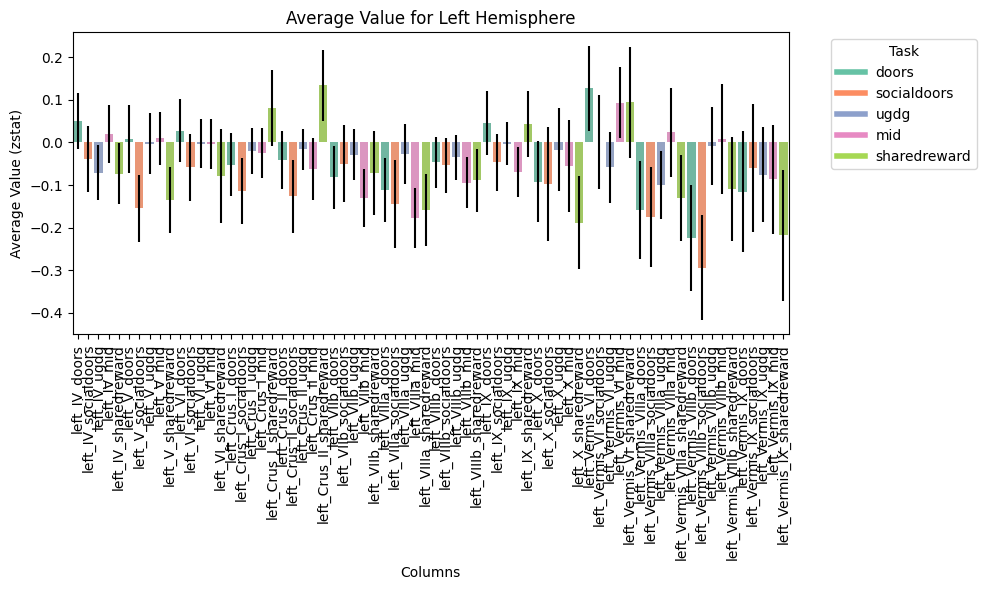

In [4]:
# Plot ipsilateral signal in the 3left hemisphere

# Filter columns for the left hemisphere
left_cols = [col for col in df.columns if col.split('_')[0] == 'left']

# Calculate the standard error of the mean for each column
sem_values = df[left_cols].sem()

# Set up color palette for tasks
colors = sns.color_palette("Set2", n_colors=len(task))

# Create bar plot with error bars
plt.figure(figsize=(10, 6))
for i, col in enumerate(left_cols):
    sns.barplot(x=[col], y=df[col].mean(), yerr=sem_values[col], capsize=10, color=colors[i % len(task)])

# Create custom legend
legend_labels = {t: colors[i % len(task)] for i, t in enumerate(task)}
legend_handles = [plt.Line2D([0], [0], color=color, lw=4, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_handles, title='Task', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Average Value for Left Hemisphere')
plt.xlabel('Columns')
plt.ylabel('Average Value (zstat)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

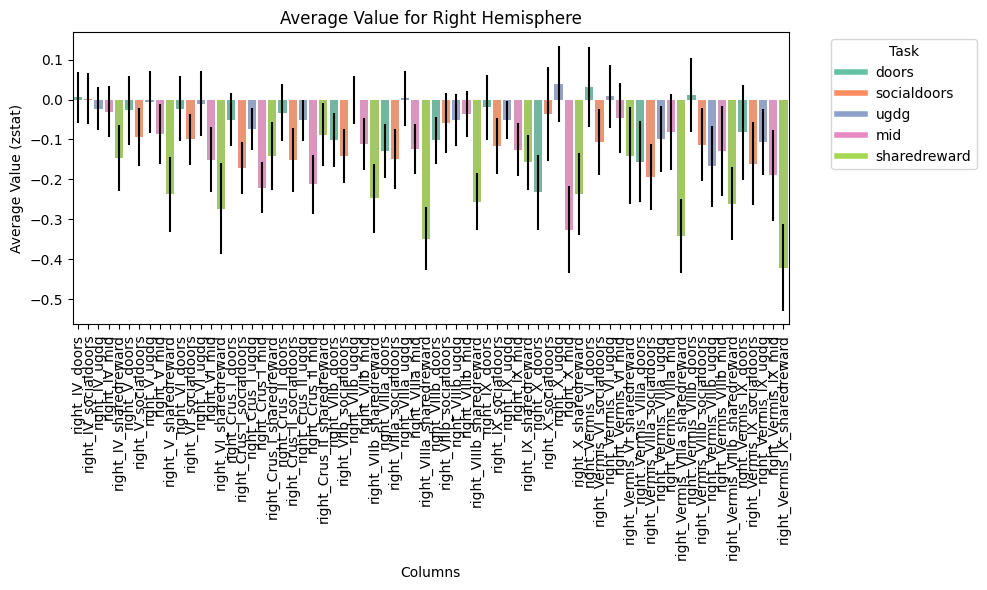

In [5]:
# Plot ipsilateral signal in the right hemisphere

# Filter columns for the right hemisphere
right_cols = [col for col in df.columns if col.split('_')[0] == 'right']

# Calculate the standard error of the mean for each column
sem_values = df[right_cols].sem()

# Set up color palette for tasks
colors = sns.color_palette("Set2", n_colors=len(task))

# Create bar plot with error bars
plt.figure(figsize=(10, 6))
for i, col in enumerate(right_cols):
    sns.barplot(x=[col], y=df[col].mean(), yerr=sem_values[col], capsize=10, color=colors[i % len(task)])

# Create custom legend
legend_labels = {t: colors[i % len(task)] for i, t in enumerate(task)}
legend_handles = [plt.Line2D([0], [0], color=color, lw=4, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_handles, title='Task', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Average Value for Right Hemisphere')
plt.xlabel('Columns')
plt.ylabel('Average Value (zstat)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

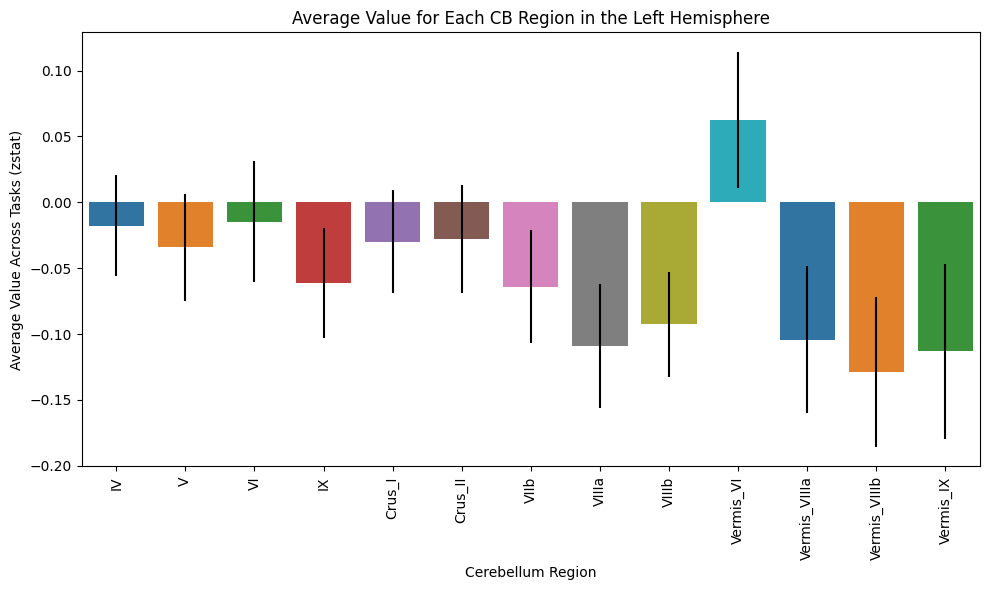

In [11]:
# Plot 5-task average for ipsilateral signal in each CB region in the left hemisphere

# Filter columns for the left hemisphere
left_cols = [col for col in df.columns if col.split('_')[0] == 'left']

# Create a new DataFrame containing only the 'left' columns
df_left = df[left_cols]

# Manually specify the columns for each cb region
cb_columns = {
    'IV': [col for col in df_left.columns if 'IV_' in col],
    'V': [col for col in df_left.columns if 'V_' in col and 'Vermis' not in col],
    'VI': [col for col in df_left.columns if 'VI_' in col and 'Vermis' not in col],
    'IX': [col for col in df_left.columns if 'IX_' in col],
    'Crus_I': [col for col in df_left.columns if 'Crus_I' in col],
    'Crus_II': [col for col in df_left.columns if 'Crus_II' in col],
    'VIIb': [col for col in df_left.columns if 'VIIb' in col],
    'VIIIa': [col for col in df_left.columns if 'VIIIa' in col],
    'VIIIb': [col for col in df_left.columns if 'VIIIb' in col],
    'Vermis_VI': [col for col in df_left.columns if 'Vermis' in col and 'VI_' in col],
    'Vermis_VIIIa': [col for col in df_left.columns if 'Vermis_VIIIa' in col and 'VIIIa_' in col],
    'Vermis_VIIIb': [col for col in df_left.columns if 'Vermis_VIIIb' in col and 'VIIIb_' in col],
    'Vermis_IX': [col for col in df_left.columns if 'Vermis' in col and 'IX_' in col]
}

# Calculate the mean for each cb region
df_cb_mean = pd.DataFrame({key: df_left[value].mean(axis=1) for key, value in cb_columns.items()})

# Calculate the standard error of the mean for each column
sem_values = df_cb_mean.sem()

# Set up color palette for cb regions
colors = sns.color_palette("Set2", n_colors=len(df_cb_mean.columns))

# Create bar plot
plt.figure(figsize=(10, 6))
for i, col in enumerate(df_cb_mean.columns):
    sns.barplot(x=[col], y=df_cb_mean[col].mean(), yerr=sem_values[col])

plt.title('Average Value for Each CB Region in the Left Hemisphere')
plt.xlabel('Cerebellum Region')
plt.ylabel('Average Value Across Tasks (zstat)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

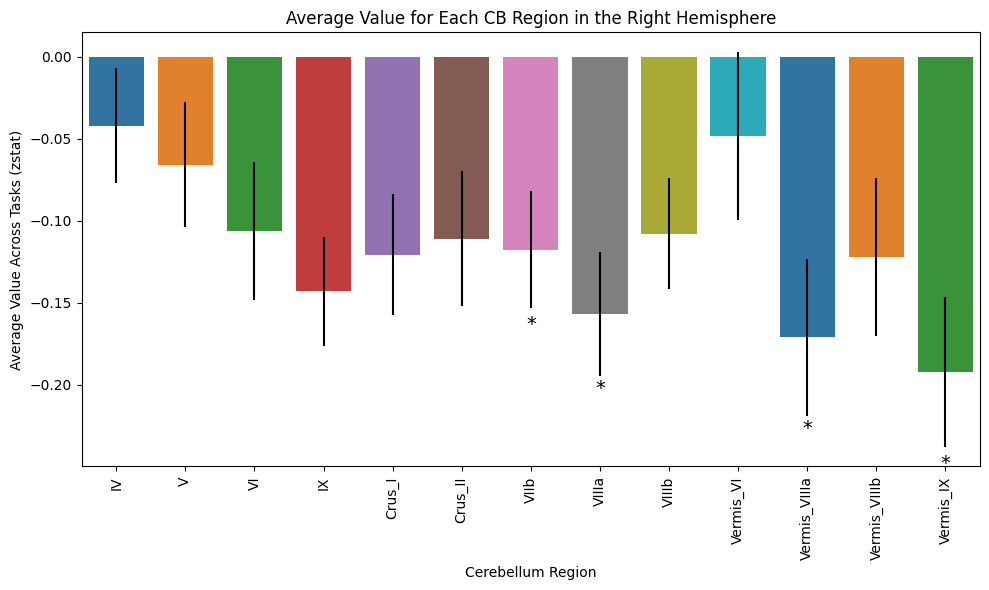

In [48]:
# Plot 5-task average for ipsilateral signal in each CB region in the right hemisphere

# Filter columns for the left hemisphere
right_cols = [col for col in df.columns if col.split('_')[0] == 'right']

# Create a new DataFrame containing only the 'left' columns
df_right = df[right_cols]

# Manually specify the columns for each cb region
cb_columns = {
    'IV': [col for col in df_right.columns if 'IV_' in col],
    'V': [col for col in df_right.columns if 'V_' in col and 'Vermis' not in col],
    'VI': [col for col in df_right.columns if 'VI_' in col and 'Vermis' not in col],
    'IX': [col for col in df_right.columns if 'IX_' in col],
    'Crus_I': [col for col in df_right.columns if 'Crus_I' in col],
    'Crus_II': [col for col in df_right.columns if 'Crus_II' in col],
    'VIIb': [col for col in df_right.columns if 'VIIb' in col],
    'VIIIa': [col for col in df_right.columns if 'VIIIa' in col],
    'VIIIb': [col for col in df_right.columns if 'VIIIb' in col],
    'Vermis_VI': [col for col in df_right.columns if 'Vermis' in col and 'VI_' in col],
    'Vermis_VIIIa': [col for col in df_right.columns if 'Vermis_VIIIa' in col and 'VIIIa_' in col],
    'Vermis_VIIIb': [col for col in df_right.columns if 'Vermis_VIIIb' in col and 'VIIIb_' in col],
    'Vermis_IX': [col for col in df_right.columns if 'Vermis' in col and 'IX_' in col]
}

# Calculate the mean for each cb region
df_cb_mean = pd.DataFrame({key: df_right[value].mean(axis=1) for key, value in cb_columns.items()})

# Calculate the standard error of the mean for each column
sem_values = df_cb_mean.sem()

# Set up color palette for cb regions
colors = sns.color_palette("Set2", n_colors=len(df_cb_mean.columns))

# Create bar plot
plt.figure(figsize=(10, 6))
for i, col in enumerate(df_cb_mean.columns):
    sns.barplot(x=[col], y=df_cb_mean[col].mean(), yerr=sem_values[col])

# Add asterisks
plt.text(12, df_cb_mean.iloc[:, 12].mean()-0.05, '*', ha='center', va='top', fontsize=14)
plt.text(10, df_cb_mean.iloc[:, 10].mean()-0.05, '*', ha='center', va='top', fontsize=14)
plt.text(7, df_cb_mean.iloc[:, 7].mean()-0.04, '*', ha='center', va='top', fontsize=14)
plt.text(6, df_cb_mean.iloc[:, 6].mean()-0.04, '*', ha='center', va='top', fontsize=14)
# Need to check Crus I and IX and make sure they're labelled correctly! These look different from what we had in Matlab
# More likely an error in Matlab I think...

plt.title('Average Value for Each CB Region in the Right Hemisphere')
plt.xlabel('Cerebellum Region')
plt.ylabel('Average Value Across Tasks (zstat)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()